__<font size =5 > Importing our Libaries__
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\EliteBook\Downloads\Heartfailure\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

__Checking our dataset for any null values: Here we see that our dataset does not have any null value__

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


__Info to see data type in our dataset, we have categorical data here: for Sex, ChestPainType, RestingECG, Exercise Angina and ST_Slope. Because I will be using my set for machine learning also, i will convert the categorical data into numerical data using encoding: Label encoding for Ordinal Columns and OneHotEncoding for Nominal Columns. First we will check the unqiue values for all the Object type columns__

In [5]:
df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [6]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [7]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [8]:
df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [9]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

__The Sex Column is a Nominal Data type consisting of Male and Female__

__ChestPainType Follows a particular Order: TA- Typical Angina, ATA- Atypical Angina, NAP-Non Angina Pain, ASY- Asymptomatic__

__Resting ECG also follows the same order as is either Normal, ST- having ST-T wave abnormality( this is T wave inversions and/or ST elevation or depression of >0.05 mV), LVH-showing probable or definite left ventricular hypertrophy by Estes' criteria)__

__ExerciseAnigina: Exercise induced angia N-No, Y-Yes__

__STSlope: The slope of peak exercise ST segment; Up-uplsoping, Flat-flat, Down-downsloping__

__Nominal Colunmns for OneHotEncoder: SEX, ExerciseAnigina__

__Ordinal Columns for LabelEncoder: ChestPainType, RestingECG, STSlope__

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [11]:
encoder= LabelEncoder()

In [12]:
df[["ChestPainType", "RestingECG", "ST_Slope"]]= df[["ChestPainType", "RestingECG", "ST_Slope"]].apply(encoder.fit_transform)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,1,172,N,0.0,2,0
1,49,F,2,160,180,0,1,156,N,1.0,1,1
2,37,M,1,130,283,0,2,98,N,0.0,2,0
3,48,F,0,138,214,0,1,108,Y,1.5,1,1
4,54,M,2,150,195,0,1,122,N,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,3,110,264,0,1,132,N,1.2,1,1
914,68,M,0,144,193,1,1,141,N,3.4,1,1
915,57,M,0,130,131,0,1,115,Y,1.2,1,1
916,57,F,1,130,236,0,0,174,N,0.0,1,1


In [13]:
df= pd.get_dummies(df)
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,1,140,289,0,1,172,0.0,2,0,0,1,1,0
1,49,2,160,180,0,1,156,1.0,1,1,1,0,1,0
2,37,1,130,283,0,2,98,0.0,2,0,0,1,1,0
3,48,0,138,214,0,1,108,1.5,1,1,1,0,0,1
4,54,2,150,195,0,1,122,0.0,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110,264,0,1,132,1.2,1,1,0,1,1,0
914,68,0,144,193,1,1,141,3.4,1,1,0,1,1,0
915,57,0,130,131,0,1,115,1.2,1,1,0,1,0,1
916,57,1,130,236,0,0,174,0.0,1,1,1,0,1,0


In [14]:
df.isna().sum()

Age                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS           0
RestingECG          0
MaxHR               0
Oldpeak             0
ST_Slope            0
HeartDisease        0
Sex_F               0
Sex_M               0
ExerciseAngina_N    0
ExerciseAngina_Y    0
dtype: int64

In [15]:
df.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.887364,1.361656,0.553377,0.210240,0.789760,0.595861,0.404139
std,9.432617,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,1.066570,0.607056,0.497414,0.407701,0.407701,0.490992,0.490992
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,60.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.500000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,6.200000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               918 non-null    int64  
 1   ChestPainType     918 non-null    int32  
 2   RestingBP         918 non-null    int64  
 3   Cholesterol       918 non-null    int64  
 4   FastingBS         918 non-null    int64  
 5   RestingECG        918 non-null    int32  
 6   MaxHR             918 non-null    int64  
 7   Oldpeak           918 non-null    float64
 8   ST_Slope          918 non-null    int32  
 9   HeartDisease      918 non-null    int64  
 10  Sex_F             918 non-null    uint8  
 11  Sex_M             918 non-null    uint8  
 12  ExerciseAngina_N  918 non-null    uint8  
 13  ExerciseAngina_Y  918 non-null    uint8  
dtypes: float64(1), int32(3), int64(6), uint8(4)
memory usage: 64.7 KB


__<font size=4>All our data has been converted to integers__
    
__<font size= 5>Exploratory Data Analysis__

__<font size=4> Creating a dataframe and filter only those diagnosed with heartdisease__

In [17]:
newdf= (df["HeartDisease"] == 1)
df[newdf]

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
1,49,2,160,180,0,1,156,1.0,1,1,1,0,1,0
3,48,0,138,214,0,1,108,1.5,1,1,1,0,0,1
8,37,0,140,207,0,1,130,1.5,1,1,0,1,0,1
11,58,1,136,164,0,2,99,2.0,1,1,0,1,0,1
13,49,0,140,234,0,1,140,1.0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,0,140,241,0,1,123,0.2,1,1,1,0,0,1
913,45,3,110,264,0,1,132,1.2,1,1,0,1,1,0
914,68,0,144,193,1,1,141,3.4,1,1,0,1,1,0
915,57,0,130,131,0,1,115,1.2,1,1,0,1,0,1


In [18]:
df[newdf].head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
1,49,2,160,180,0,1,156,1.0,1,1,1,0,1,0
3,48,0,138,214,0,1,108,1.5,1,1,1,0,0,1
8,37,0,140,207,0,1,130,1.5,1,1,0,1,0,1
11,58,1,136,164,0,2,99,2.0,1,1,0,1,0,1
13,49,0,140,234,0,1,140,1.0,1,1,0,1,0,1


__<Font size= 3>1. What is the correlation between all indices/features and developing a Heart Disease?__

In [19]:
df[newdf].corr()  #among those diagnosed with heart disease

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
Age,1.000000,0.043282,0.260211,-0.041392,0.096688,0.036519,-0.246705,0.126277,-0.079585,NaN,0.010626,-0.010626,-0.062735,0.062735
ChestPainType,0.043282,1.000000,-0.007397,-0.021139,-0.006188,0.017185,0.149162,-0.080902,0.027078,NaN,-0.025962,0.025962,0.240239,-0.240239
RestingBP,0.260211,-0.007397,1.000000,0.167097,0.028124,0.015151,-0.112153,0.155366,-0.040884,NaN,0.130351,-0.130351,-0.158327,0.158327
Cholesterol,-0.041392,-0.021139,0.167097,1.000000,-0.295467,-0.179475,0.187556,0.210180,-0.045769,NaN,0.124032,-0.124032,-0.136766,0.136766
FastingBS,0.096688,-0.006188,0.028124,-0.295467,1.000000,0.153205,-0.029182,-0.108454,-0.005919,NaN,-0.010255,0.010255,0.126888,-0.126888
RestingECG,0.036519,0.017185,0.015151,-0.179475,0.153205,1.000000,-0.175228,-0.022000,-0.063603,NaN,-0.080658,0.080658,-0.092928,0.092928
MaxHR,-0.246705,0.149162,-0.112153,0.187556,-0.029182,-0.175228,1.000000,0.026167,0.194549,NaN,0.143745,-0.143745,0.246770,-0.246770
Oldpeak,0.126277,-0.080902,0.155366,0.210180,-0.108454,-0.022000,0.026167,1.000000,-0.271207,NaN,0.017741,-0.017741,-0.264067,0.264067
ST_Slope,-0.079585,0.027078,-0.040884,-0.045769,-0.005919,-0.063603,0.194549,-0.271207,1.000000,NaN,-0.024669,0.024669,0.196475,-0.196475
HeartDisease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

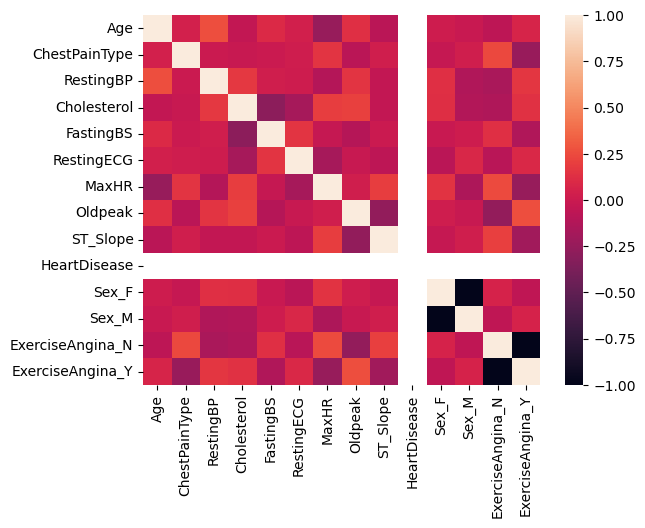

In [20]:
sns.heatmap(df[newdf].corr())

In [21]:
#looking at the whole dataset
df.corr()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
Age,1.000000,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.258612,-0.268264,0.282039,-0.055750,0.055750,-0.215793,0.215793
ChestPainType,-0.077150,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.177377,0.213521,-0.386828,0.126559,-0.126559,0.354727,-0.354727
RestingBP,0.254399,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.164803,-0.075162,0.107589,-0.005133,0.005133,-0.155101,0.155101
Cholesterol,-0.095282,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,0.050148,0.111471,-0.232741,0.200092,-0.200092,0.034166,-0.034166
FastingBS,0.198039,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.052698,-0.175774,0.267291,-0.120076,0.120076,-0.060451,0.060451
RestingECG,-0.007484,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,-0.020438,-0.006778,0.057384,-0.071552,0.071552,-0.077500,0.077500
MaxHR,-0.382045,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.160691,0.343419,-0.400421,0.189186,-0.189186,0.370425,-0.370425
Oldpeak,0.258612,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,1.000000,-0.501921,0.403951,-0.105734,0.105734,-0.408752,0.408752
ST_Slope,-0.268264,0.213521,-0.075162,0.111471,-0.175774,-0.006778,0.343419,-0.501921,1.000000,-0.558771,0.150693,-0.150693,0.428706,-0.428706
HeartDisease,0.282039,-0.386828,0.107589,-0.232741,0.267291,0.057384,-0.400421,0.403951,-0.558771,1.000000,-0.305445,0.305445,-0.494282,0.494282


<AxesSubplot:>

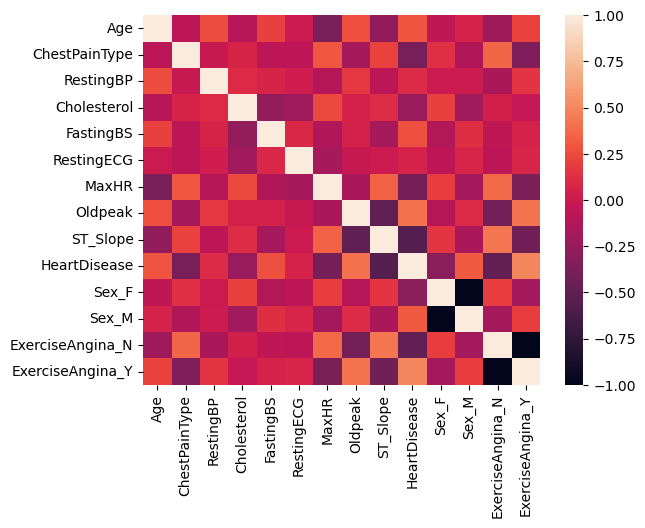

In [22]:
sns.heatmap(df.corr())

In [23]:
df["HeartDisease"].corr(df["ChestPainType"])

-0.3868276942625647

In [24]:
df["HeartDisease"].corr(df["Age"])

0.28203850581899687

__<font size=3> From our analysis, there is no positive correlation between all attributes and developing a heart disease__

__<Font size=4> 2. What is the distribution of the disease among Male and Females?__

In [25]:
df[newdf].groupby(["Sex_M", "Sex_F"])["HeartDisease"].count()

Sex_M  Sex_F
0      1         50
1      0        458
Name: HeartDisease, dtype: int64

__<font size=4> Among those who were diagnosed with Heart Disease; 50 of them were Females while 458 are males__

In [29]:
df2=pd.read_csv(r"C:\Users\EliteBook\Downloads\Heartfailure\heart.csv")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

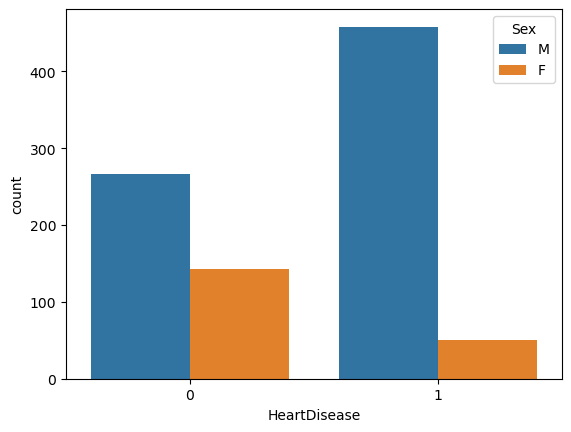

In [30]:
sns.countplot(data=df2, x="HeartDisease", hue="Sex")

__<font size=4> 3. What is the distribution by Age among those diagnosed?__

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

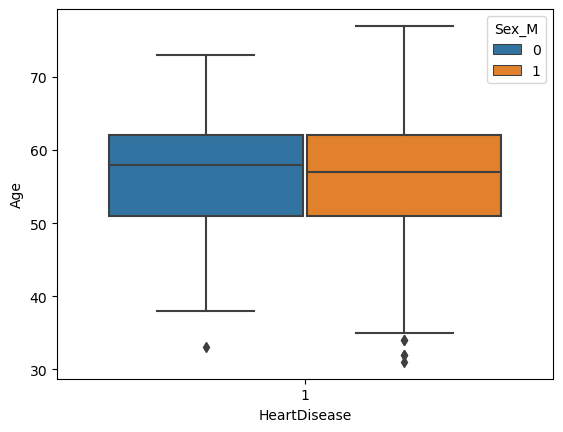

In [109]:
sns.boxplot(data =df[newdf], x="HeartDisease", y="Age", hue="Sex_M")

__<font size=4> amongst those diagnosed with heart disesea__
__we see a bit of outliers on both ends where by people below the age 40 were also diagnosed with the disease__

__<font size = 4> 4. Exploring the Chest Pain Type and Heart Disease for the general data set and among those diagnosed__

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

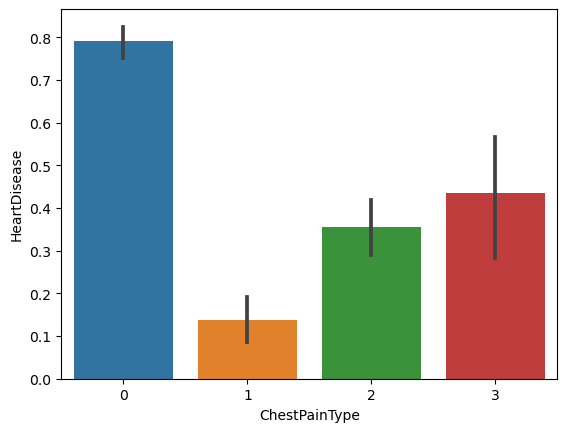

In [111]:
sns.barplot(data =df, x="ChestPainType", y="HeartDisease", hue_order=["Sex_M", "Sex_F"])

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

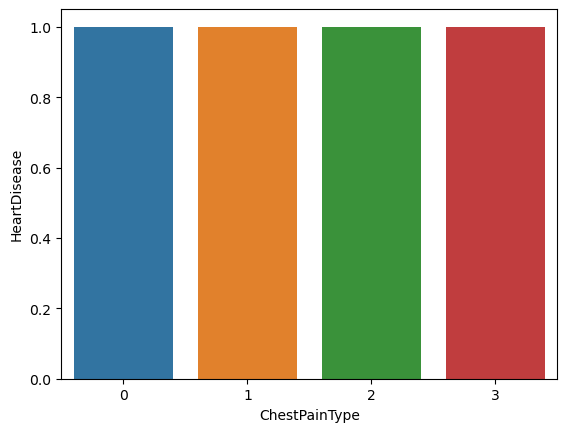

In [113]:
sns.barplot(data =df[newdf], x="ChestPainType", y="HeartDisease", hue_order=["Sex_M", "Sex_F"])

__<font size =4> Generally, the prevailing ChestPainType is label 0- However, across all boards it didn't equate to being diagnosed with the disease, while amongst those who were already diagnosed we see all four forms of chestpaintype being present__

__<font size=6> MACHINE LEARNING__

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [120]:
#defining our input and output; we want to make predictions on Heart Disease
x= df.drop("HeartDisease", axis=1).values
x.shape

(918, 13)

In [122]:
y= df.HeartDisease.values
y.shape

(918,)

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
model.score(x_train, y_train)

0.8501362397820164

In [127]:
pred=model.predict(x_test)
pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [128]:
model.score(x_test, pred)

1.0

__<font size=5> K-fold Cross Validation__

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

In [146]:
kfold= KFold(n_splits=10, shuffle=True, random_state=1)

In [147]:
cv_scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
cv_scores

array([0.85135135, 0.81081081, 0.87837838, 0.81081081, 0.78082192,
       0.87671233, 0.84931507, 0.90410959, 0.82191781, 0.87671233])

In [148]:
print('Accuracy: %.3f (%.3f)' % (mean(cv_scores), std(cv_scores)))

Accuracy: 0.846 (0.037)


In [155]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np

In [156]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)

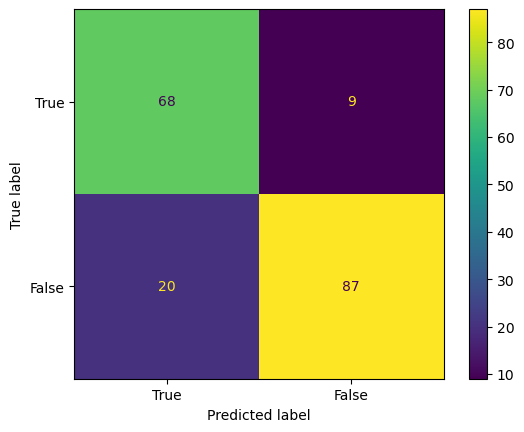

In [153]:
ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False]).plot()
plt.show()

In [160]:
print(accuracy_score(y_test, pred))

0.842391304347826


In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



__<font size=6> Our model was able to detect events in the positive class with a sensitivity of 77% and has a specificity of 91%__